# Plot x^2+y^2

This sample uses [bacon-poly2](https://github.com/Haishi2016/bacon-net/) to plot x^2 + y^2

In [1]:
from bacon import dataCreator
from nets.poly2 import poly2
import numpy as np

In [2]:
# Create a new instance of Bacon-Poly2 network
net = poly2()

In [3]:
# generate 1000 data entries, scaled to [0,1], with lambda z = x ^2 + y ^ 2
a, b, y = dataCreator.create(1000, 1, lambda a, b: a * a + b * b)


In [4]:
# OPTIONAL: print out the dataset
print(np.column_stack((a,b,y)))

[[0.73907275 0.21259072 0.59142335]
 [0.33336013 0.897967   0.9174737 ]
 [0.92124327 0.69722896 1.33481738]
 ...
 [0.86473225 0.77338416 1.34588493]
 [0.83274042 0.88000095 1.46785828]
 [0.54518329 0.34391622 0.41550319]]


In [5]:
# Train the network
history = net.fit(a,b,y)

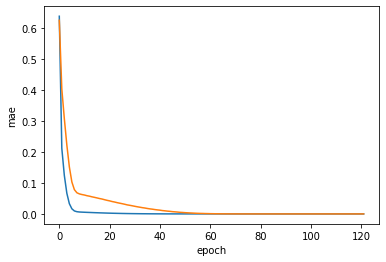

In [6]:
# OPTIONAL: Plot learning history. Bacon-Net does early stopping after no improvements after 10 iterations
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['mae'])
plt.ylabel('mae')
plt.xlabel('epoch')
plt.show()

In [7]:
# Explain the network
m = net.explain()
print(m)

z = 1.0x^2 + 1.0y^2


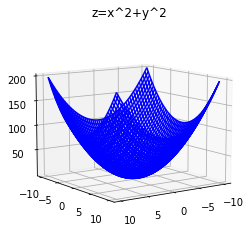

In [48]:
import math
def f(x, y): 
    tx = x.reshape(-1,1)
    ty = y.reshape(-1,1)      
    p = net.predict(tx.tolist(),ty.tolist())    
    l = int(math.sqrt(len(p)))
    return p.reshape(l,l, order='C')
    
 
# x and y axis
x = np.arange(-10, 10, 0.1)
y = np.arange(-10, 10, 0.1)
  
X, Y = np.meshgrid(x, y)
Z = f(X, Y)
fig = plt.figure()
ax = plt.axes(projection ='3d')
ax.plot_wireframe(X, Y, Z, color ='blue')
ax.set_title('z=x^2+y^2')
ax.view_init(10,55)